In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [72]:
# Load your pre-trained model
model_file_path = "./best_model.h5"
model = tf.keras.models.load_model(model_file_path)

In [73]:


# Define image size (as used during preprocessing)
image_height = 224
image_width = 224

# Load and preprocess the input image
img_path = "./Normal/N12.jpg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(image_height, image_width))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
img = np.expand_dims(img, axis=0)

In [74]:
# Calculate the gradients of the target class with respect to the last convolutional layer's output
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img)
    target_class_output = predictions[:, 0] 

# Get the gradients with respect to the las
grads = tape.gradient(target_class_output, conv_outputs)[0]
grads_mean = tf.reduce_mean(grads, axis=-1, keepdims=True)

heatmap = grads_mean * conv_outputs
heatmap = tf.reduce_mean(heatmap, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap)
heatmap = heatmap.numpy()
heatmap = np.expand_dims(heatmap, axis=0)
heatmap = np.expand_dims(heatmap, axis=-1)
heatmap = tf.image.resize(heatmap, (image_height, image_width))
heatmap = heatmap.numpy()
superimposed_img = (heatmap * 0.4) + (img[0] * 0.6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


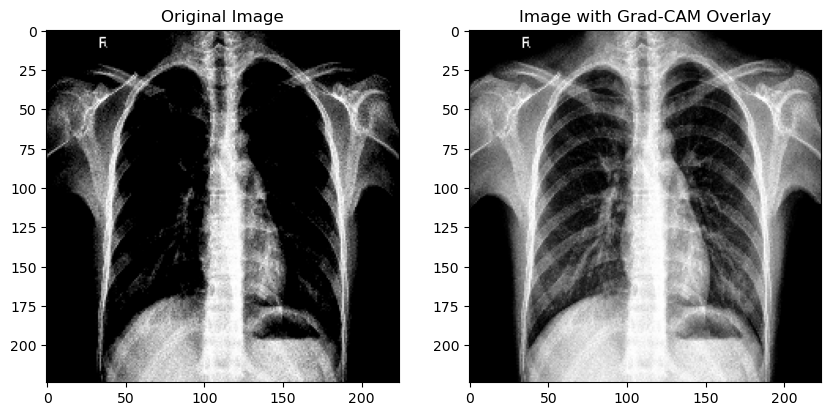

In [75]:
# Display the original image and the image with Grad-CAM overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img[0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title("Image with Grad-CAM Overlay")
plt.show()